19. Оптимизация. Задача упаковки кругов

Используем функцию scipy.optimize.minimize. Для этого вместо максимизации радиуса меньших кругов r внутри единичного минимизируем внешний радиус R большего круга с единичными внутри.
Тогда ограничения принимают вид:

\begin{gather*}
x^2+y^2 \leq (1-r)  \longrightarrow  x^2+y^2 \leq (R-1)\\
\\
(x_1-x_2)^2+(y_1-y_2)^2 \geq 4r^2\\
\\
0 \leq r \leq 1 \longrightarrow 1 \leq R \leq n
\end{gather*}


Функция limits создает массив с новыми ограничениями. 

Функция pack() принимает на вход n, задаёт значение R = n, находящееся в points[0], генерирует координаты внутренних кругов,
находящиеся в points[i], (i =1, ..., 2n+1),  и минимизирует R с учётом ограничений. Далее делим полученные значения координат и r = 1 на R. Таким образом получаем нужные координаты и r. Повторяем в цикле, пока разница с решениями, приведенными на сайте www.packomania.com, хранящимися в массиве reference, не будет меньше заданного eps.


Выводим найденный результат и эталонный. Строим график большого и меньших кругов.

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random
%matplotlib inline

def limits(x):
    lim = [x[0] - 1, n - x[0]]
    
    for i in range(1, 2*n, 2):
        lim.append((x[0]-1)**2 - x[i]**2 - x[i+1]**2)

    for i in range(1, 2*n, 2):
        for j in range(i+2, 2*n + 1, 2):
            lim.append((x[i] - x[j])**2 + (x[i+1] - x[j+1])**2 - 4)
    
    return lim

def pack(n):
    radi = 0
    while (radi < reference[n-1] - eps):
        points = [random.uniform(-n,n) for i in range(2*n+1)]
        points[0] = n
        res = minimize(lambda x: x[0], points, constraints=({'type':'ineq','fun': limits}))
        points = res.x 
        points = res.x / res.x[0] 
        points[0] = 1 / res.x[0]
        radi = points[0]
        if radi > 1:
            radi = reference[n-1] - 2 * eps 
    
    print("Найденный радиус =", radi)
    print("Эталонный радиус =", reference[n-1])
    
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_aspect(1)
    ax.add_artist(plt.Circle((0, 0), 1, color='black')) 
    for i in range(1, 2*n+1, 2): 
        ax.add_artist(plt.Circle((points[i], points[i+1]), points[0], color = 'white')) 
        
    return

eps = 0.001
reference = np.array([1.000000000000000000000000000000, 0.500000000000000000000000000000, 0.464101615137754587054892683012, 0.414213562373095048801688724210,
                      0.370191908158750137702237641058, 0.333333333333333333333333333333, 0.333333333333333333333333333333, 0.302593388348611302909204224934,
                      0.276768653914155215717770973808, 0.262258924190165855095630653709, 0.254854701717148909608835737700, 0.248163470571686841544054487132,
                      0.236067977499789696409173668731, 0.231030727971008638446179972284, 0.221172539086390937264316484926, 0.216664742924422421010647936933,
                      0.208679665570499743200080125264, 0.205604646759568224693193969093, 0.205604646759568224693193969093, 0.195224011018748878291305694833,
                      0.190392146849053511968808973057, 0.183833026581681677264411480513, 0.180336009254436500349252193252, 0.176939130595961682695732682453,
                      0.173827661421222233359259594413, 0.171580252187166848283936226172, 0.169307931134573046568970317658, 0.166252750038606935814942389058,
                      0.162903649276644353945069772319, 0.161349109064689865167358846536])

Найденный радиус = 0.9999999999999998
Эталонный радиус = 1.0


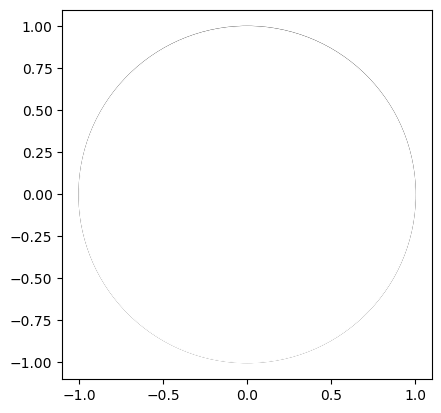

In [6]:
n = 1
pack(n)

Найденный радиус = 0.49999999999761446
Эталонный радиус = 0.5


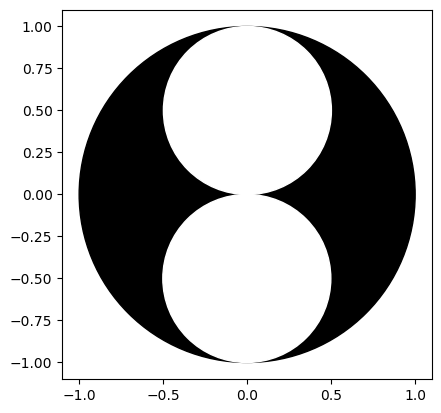

In [7]:
n = 2
pack(n)

Найденный радиус = 0.4641016266725699
Эталонный радиус = 0.4641016151377546


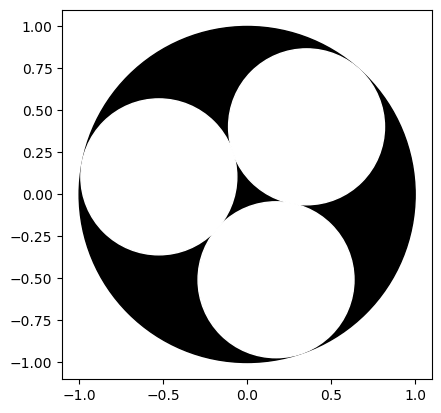

In [8]:
n = 3
pack(n)

Найденный радиус = 0.41421356232348927
Эталонный радиус = 0.41421356237309503


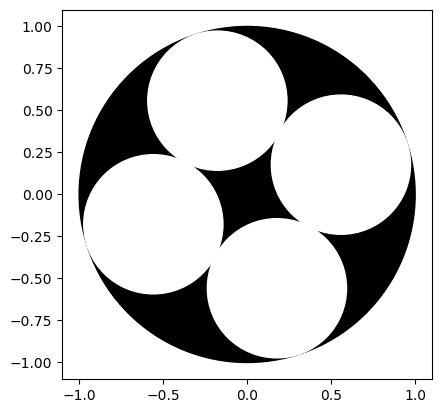

In [9]:
n = 4
pack(n)

Найденный радиус = 0.37019190556361325
Эталонный радиус = 0.37019190815875014


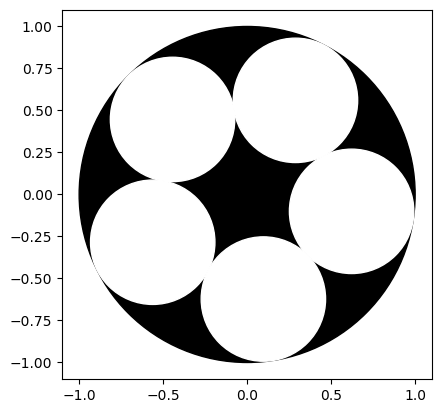

In [10]:
n = 5
pack(n)

Найденный радиус = 0.33333333333272075
Эталонный радиус = 0.3333333333333333


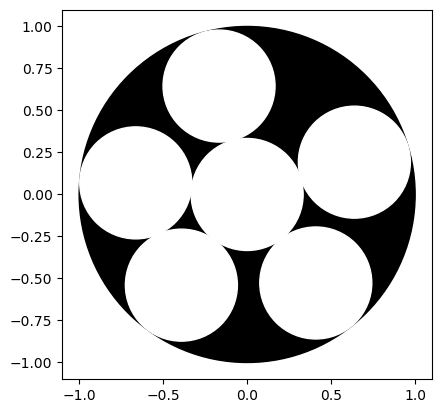

In [11]:
n = 6
pack(n)

Найденный радиус = 0.33333333363575046
Эталонный радиус = 0.3333333333333333


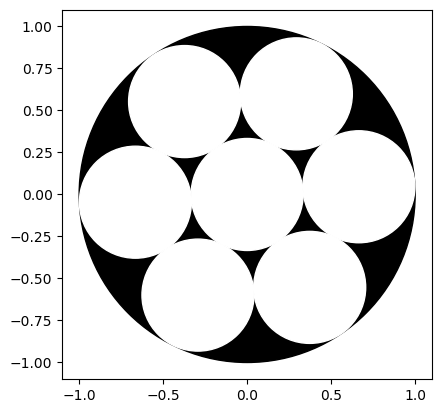

In [12]:
n = 7
pack(n)

Найденный радиус = 0.30259338320959767
Эталонный радиус = 0.3025933883486113


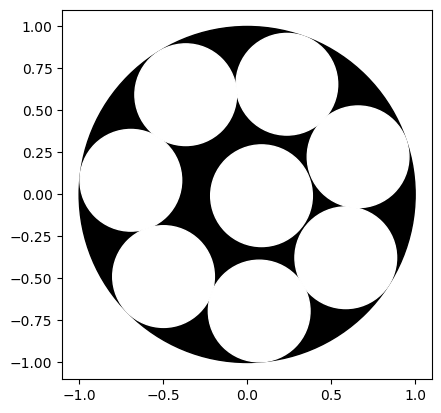

In [13]:
n = 8
pack(n)

Найденный радиус = 0.2767686557755325
Эталонный радиус = 0.2767686539141552


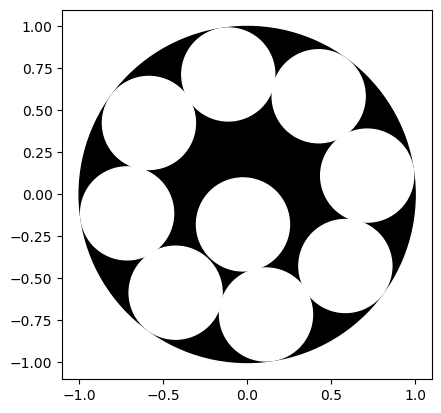

In [14]:
n = 9
pack(n)

Найденный радиус = 0.262258924190164
Эталонный радиус = 0.26225892419016583


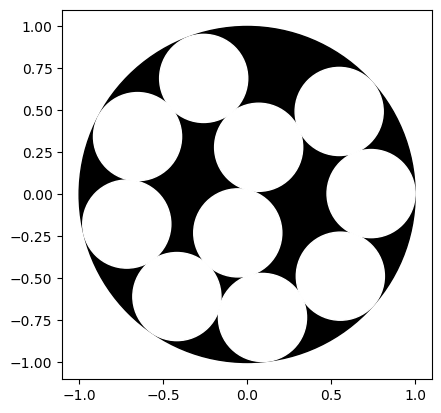

In [15]:
n = 10
pack(n)

Найденный радиус = 0.2548547017086023
Эталонный радиус = 0.2548547017171489


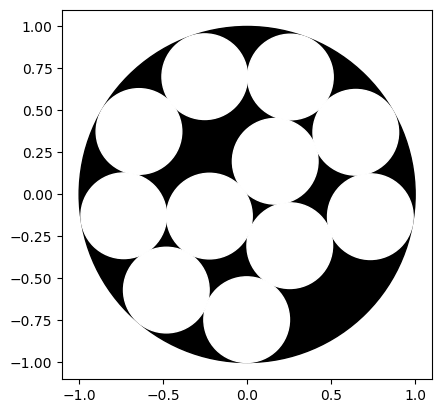

In [16]:
n = 11
pack(n)

Найденный радиус = 0.2481634686523491
Эталонный радиус = 0.24816347057168683


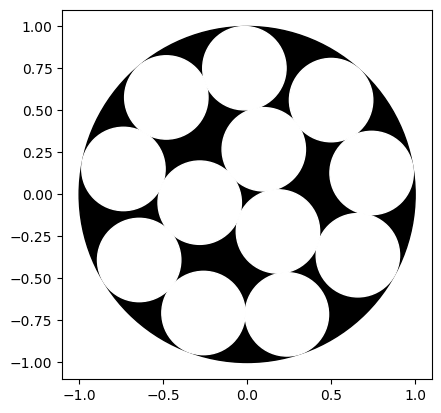

In [17]:
n = 12
pack(n)

Найденный радиус = 0.23606797731764706
Эталонный радиус = 0.2360679774997897


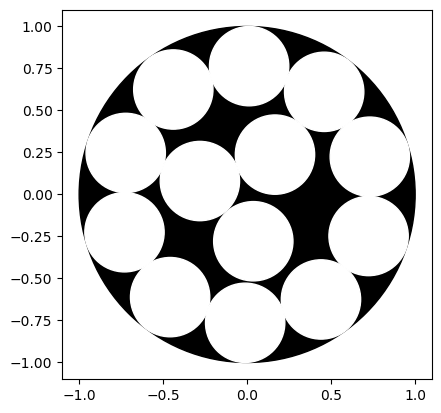

In [18]:
n = 13
pack(n)

Найденный радиус = 0.23103072796929236
Эталонный радиус = 0.23103072797100863


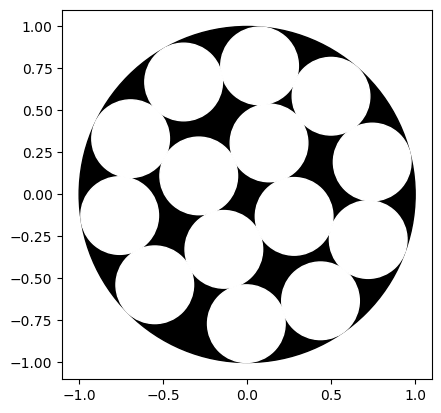

In [19]:
n = 14
pack(n)

Найденный радиус = 0.2211725392512713
Эталонный радиус = 0.22117253908639092


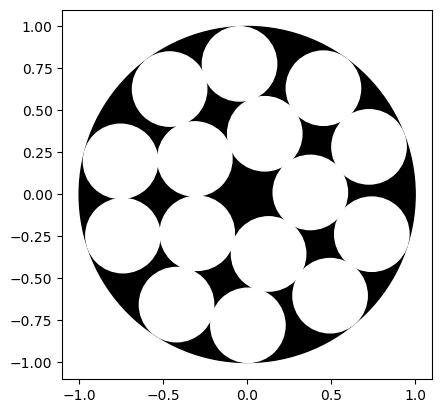

In [26]:
n = 15
pack(n)

Найденный радиус = 0.21666474292434815
Эталонный радиус = 0.21666474292442242


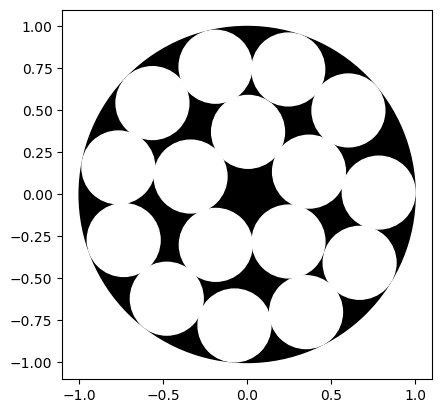

In [24]:
n = 16
pack(n)

Найденный радиус = 0.20867966556721726
Эталонный радиус = 0.20867966557049974


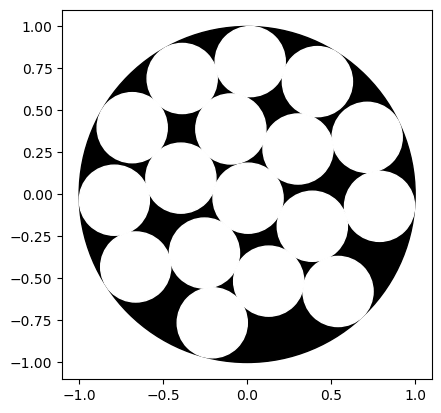

In [3]:
n = 17
pack(n)

Найденный радиус = 0.2056046469735056
Эталонный радиус = 0.20560464675956822


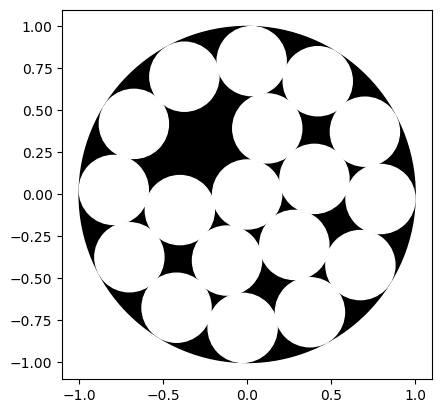

In [4]:
n = 18
pack(n)

Найденный радиус = 0.20560464527894004
Эталонный радиус = 0.20560464675956822


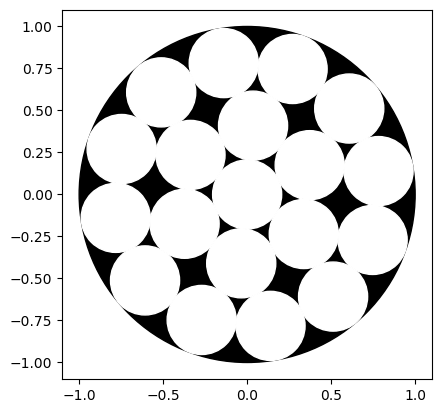

In [5]:
n = 19
pack(n)

Найденный радиус = 0.1952240110178186
Эталонный радиус = 0.19522401101874887


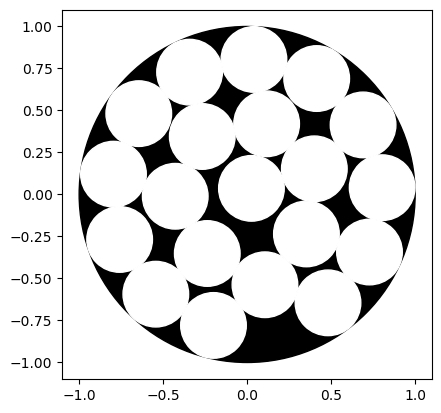

In [6]:
n = 20
pack(n)

Найденный радиус = 0.19033758391121647
Эталонный радиус = 0.1903921468490535


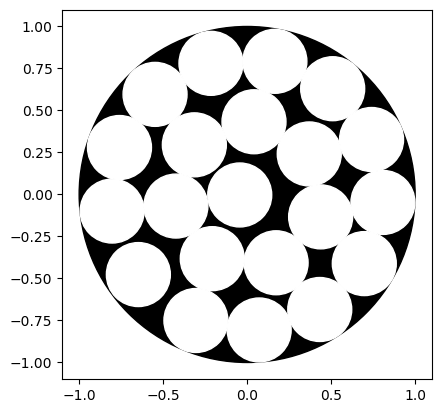

In [7]:
n = 21
pack(n)

Найденный радиус = 0.18319926846425555
Эталонный радиус = 0.18383302658168169


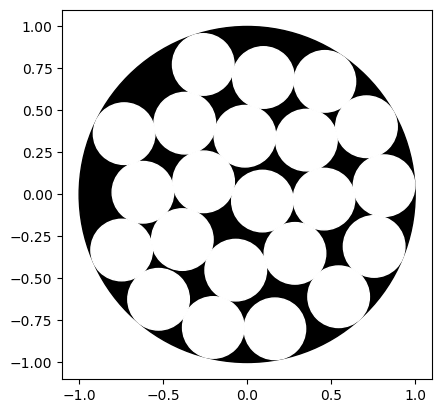

In [2]:
n = 22
pack(n)

Найденный радиус = 0.18000816475690495
Эталонный радиус = 0.1803360092544365


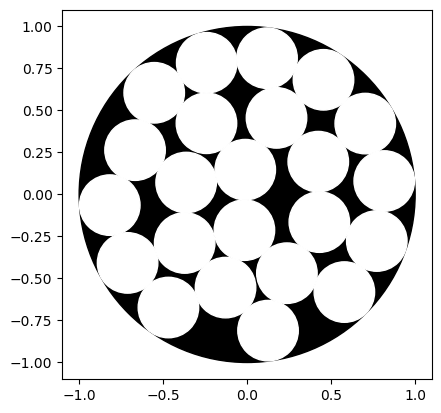

In [3]:
n = 23
pack(n)

Найденный радиус = 0.17655070598579908
Эталонный радиус = 0.17693913059596167


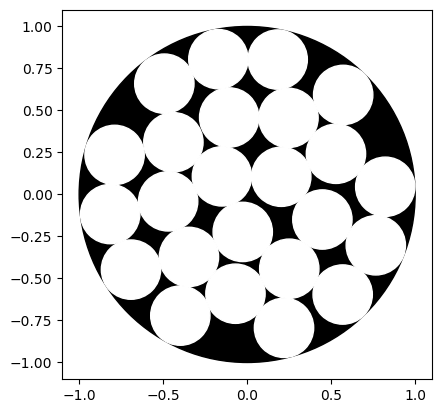

In [2]:
n = 24
pack(n)

Найденный радиус = 0.17344046115519063
Эталонный радиус = 0.17382766142122225


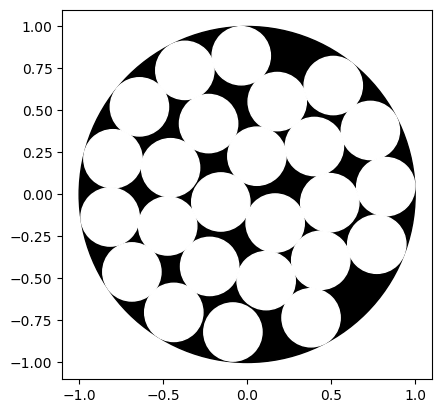

In [3]:
n = 25
pack(n)

Найденный радиус = 0.17092521265246968
Эталонный радиус = 0.17158025218716685


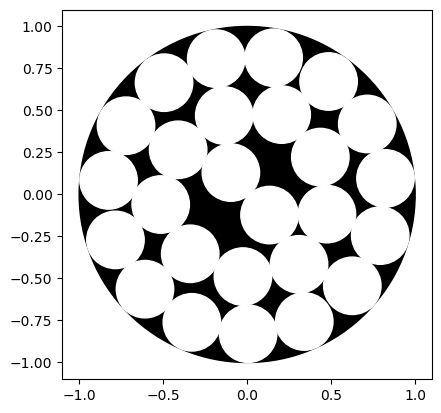

In [4]:
n = 26
pack(n)

Найденный радиус = 0.16929923723076867
Эталонный радиус = 0.16930793113457304


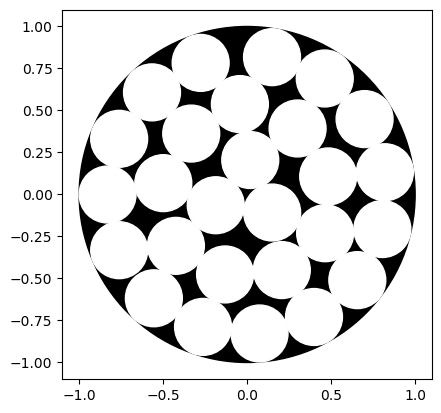

In [5]:
n = 27
pack(n)

Найденный радиус = 0.16550158402123838
Эталонный радиус = 0.16625275003860693


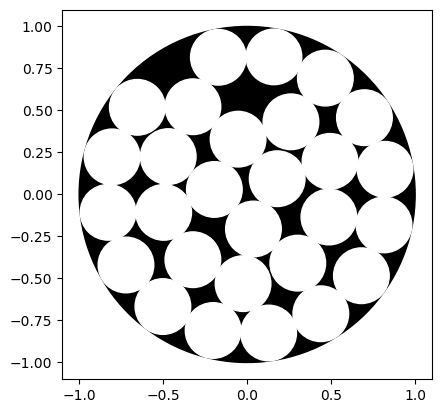

In [6]:
n = 28
pack(n)

Найденный радиус = 0.16225324200356536
Эталонный радиус = 0.16290364927664436


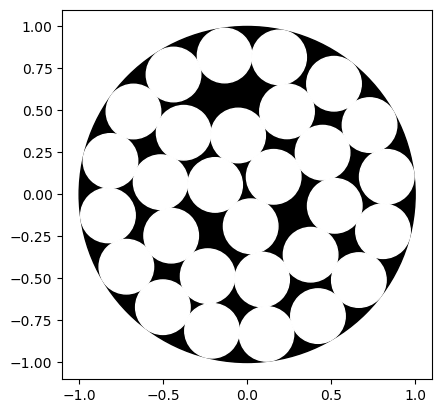

In [9]:
n = 29
pack(n)

Найденный радиус = 0.16107676373097243
Эталонный радиус = 0.16134910906468986


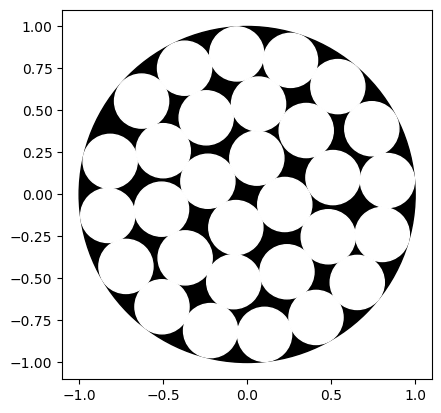

In [10]:
n = 30
pack(n)